In [1]:
# 1. Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Configure visualization settings
# Display plots directly inside the notebook
%matplotlib inline 
# Set a standard style for seaborn plots
sns.set_style("whitegrid") 

# 3. Suppress warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# 4. Load the main dataset (Application details)
apps_df = pd.read_csv('googleplaystore.csv')

# 5. Load the user reviews dataset (Sentiment analysis data)
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

# 6. Confirm data loading by printing the shape (rows, columns)
print(f"Apps Dataset loaded: {apps_df.shape[0]} rows, {apps_df.shape[1]} columns")
print(f"Reviews Dataset loaded: {reviews_df.shape[0]} rows, {reviews_df.shape[1]} columns")

Apps Dataset loaded: 10841 rows, 13 columns
Reviews Dataset loaded: 64295 rows, 5 columns


In [3]:
# 7. Display the first 5 rows to understand the structure
display(apps_df.head())

# 8. Check data types and missing values
# Pay close attention to 'Installs', 'Size', 'Price', and 'Reviews'
print("\n--- Data Info & Types ---")
apps_df.info()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



--- Data Info & Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# 9. Impute Missing 'Rating' Values
# Instead of filling with the global mean, use the mean of the specific Category
print("Before imputation, missing Ratings:", apps_df['Rating'].isnull().sum())

# Calculate mean rating per Category
category_mean_rating = apps_df.groupby('Category')['Rating'].transform('mean')

# Fill NaNs with the category mean
apps_df['Rating'].fillna(category_mean_rating, inplace=True)

print("After imputation, missing Ratings:", apps_df['Rating'].isnull().sum())
print("Missing ratings filled with category averages.")

Before imputation, missing Ratings: 1474
After imputation, missing Ratings: 0
Missing ratings filled with category averages.


In [5]:
# 10. Process Reviews Data for Merging
# Drop rows where the review text is missing
reviews_df.dropna(subset=['Translated_Review'], inplace=True)

# Calculate the mean Sentiment Polarity and Subjectivity for each App
# This condenses multiple reviews into a single feature vector per App
sentiment_score = reviews_df.groupby('App')[['Sentiment_Polarity', 'Sentiment_Subjectivity']].mean().reset_index()

print(f"Sentiment scores calculated for {sentiment_score.shape[0]} apps.")
display(sentiment_score.head())

Sentiment scores calculated for 865 apps.


,App,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,0.470733,0.495455
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
2,11st,0.185943,0.455340
3,1800 Contacts - Lens Store,0.318145,0.591098
4,1LINE – One Line with One Touch,0.196290,0.557315


In [6]:
# 11. Merge Apps and Sentiment Data
# We use a Left Join to keep all apps from the main list, even if they don't have reviews
final_df = pd.merge(apps_df, sentiment_score, on='App', how='left')

# Apps without reviews will have NaN sentiment. Fill them with 0 (Neutral).
final_df['Sentiment_Polarity'].fillna(0, inplace=True)
final_df['Sentiment_Subjectivity'].fillna(0, inplace=True)

print(f"Datasets merged. Final shape: {final_df.shape}")
display(final_df.head())

Datasets merged. Final shape: (10841, 15)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.000000,0.00000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.152652,0.64154
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.000000,0.00000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.000000,0.00000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.000000,0.00000


In [7]:
# 12. Final Data Preparation (Fixing Non-Numeric Columns)
# Önce kopyamızı oluşturalım
model_df = final_df.copy()

# 1. 'Installs' temizliği (Kalan +, , işaretlerini temizle ve sayıya çevir)
model_df['Installs'] = model_df['Installs'].astype(str).str.replace('+', '').str.replace(',', '')
model_df['Installs'] = pd.to_numeric(model_df['Installs'], errors='coerce')

# 2. 'Type' dönüşümü (Free -> 0, Paid -> 1)
model_df['Type'] = model_df['Type'].map({'Free': 0, 'Paid': 1})
# Haritalama sonrası oluşabilecek boşlukları 0 (Free) ile doldur
model_df['Type'].fillna(0, inplace=True)

# 3. Gereksiz Sütunları Atma
# 'App', 'Genres', 'Current Ver', 'Android Ver' zaten gidicekti.
# 'Last Updated' sütununu da ATIYORUZ (Çünkü makine string tarihi anlamaz)
cols_to_drop = ['App', 'Genres', 'Current Ver', 'Android Ver', 'Last Updated']
# Sadece var olan sütunları düşür (hata almamak için)
cols_to_drop = [c for c in cols_to_drop if c in model_df.columns] 
model_df.drop(cols_to_drop, axis=1, inplace=True)

# 4. One-Hot Encoding ve True/False Düzeltme
# Kategorik verileri dönüştür
model_df = pd.get_dummies(model_df, columns=['Category', 'Content Rating'], drop_first=True)

# True/False değerlerini 1 ve 0'a çevir
model_df = model_df.replace({True: 1, False: 0})

# SON KONTROL
print("--- Data Types Summary ---")
# Eğer 'object' tipinde bir sütun kaldıysa listede göreceğiz
print(model_df.dtypes.value_counts()) 

print("\n--- First 3 Rows ---")
display(model_df.head(3))

--- Data Types Summary ---
int64      38
float64     5
object      3
Name: count, dtype: int64

--- First 3 Rows ---


,Rating,Reviews,Size,Installs,Type,Price,Sentiment_Polarity,Sentiment_Subjectivity,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,...,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19M,10000.0,0.0,0,0.000000,0.00000,1,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,14M,500000.0,0.0,0,0.152652,0.64154,1,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,8.7M,5000000.0,0.0,0,0.000000,0.00000,1,0,...,0,0,0,0,0,1,0,0,0,0


Fixed 'Size' column: All values are now numeric.

--- Final Data Status ---
int64      38
float64     6
Name: count, dtype: int64


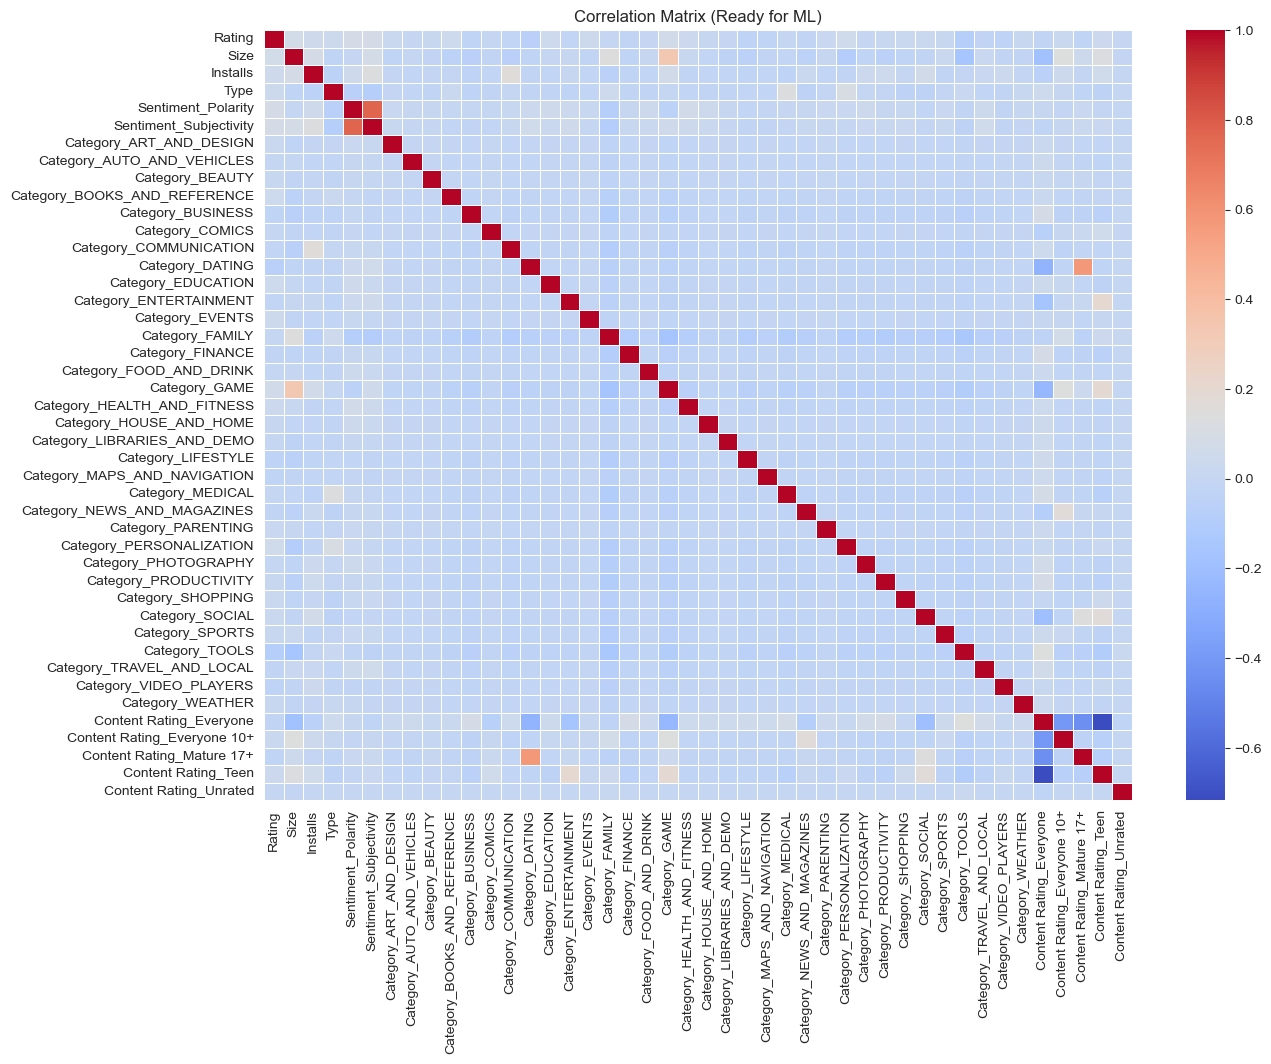

In [8]:
# 13. Final Clean-up and Correlation Matrix (Fixing Size Error)

# 1. Önce problemli 'Size' sütununu temizleyen fonksiyonumuzu tekrar tanımlayalım
def clean_size_final(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

# 2. Fonksiyonu uygula
model_df['Size'] = model_df['Size'].apply(clean_size_final)

# 3. KRİTİK ADIM: Zorla Sayıya Çevir (Force Numeric)
# 'errors='coerce'' parametresi, sayıya çevrilemeyen her şeyi (metinleri) NaN yapar.
model_df['Size'] = pd.to_numeric(model_df['Size'], errors='coerce')

# 4. Artık içinde metin kalmadığına eminiz, ortalama ile doldurabiliriz
model_df['Size'].fillna(model_df['Size'].mean(), inplace=True)
print("Fixed 'Size' column: All values are now numeric.")

# 5. Kalan diğer metin (object) sütunlarını modelden atalım
model_df = model_df.select_dtypes(exclude=['object'])

print("\n--- Final Data Status ---")
print(model_df.dtypes.value_counts()) # Burada artık 'object' görmemelisin

# 6. Korelasyon Haritasını Çizelim
plt.figure(figsize=(14, 10))
# Sadece sayısal sütunları seçip korelasyona sokuyoruz (Garanti olsun diye)
sns.heatmap(model_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5) 
plt.title("Correlation Matrix (Ready for ML)")
plt.show()

In [9]:
# =============================================================================
# 14. Model Data Inspection (Strictly model_df)
# =============================================================================

# --- Step 1: Restore 'Price' Column ---
# The 'Price' column was excluded earlier because it contained '$' symbols.
# We clean it and add it back to model_df to ensure the dataset is complete.
clean_price = final_df['Price'].astype(str).str.replace('$', '')
model_df['Price'] = pd.to_numeric(clean_price, errors='coerce').fillna(0)

print("✅ Status: 'Price' column restored and converted to numeric in model_df.\n")

# --- Step 2: First 5 Rows (Head) ---
print("--- 1. First 5 Rows (Head) ---")
display(model_df.head())

# --- Step 3: Last 5 Rows (Tail) ---
print("\n--- 2. Last 5 Rows (Tail) ---")
display(model_df.tail())

# --- Step 4: Dataset Structure (Info) ---
print("\n--- 3. Dataset Information (Info) ---")
# This confirms all columns are numeric (float, int, uint8)
model_df.info()

# --- Step 5: Statistical Summary (Describe) ---
print("\n--- 4. Descriptive Statistics (Describe) ---")
# Transposing (.T) makes it easier to read when there are many columns
display(model_df.describe().T)

✅ Status: 'Price' column restored and converted to numeric in model_df.

--- 1. First 5 Rows (Head) ---


,Rating,Size,Installs,Type,Sentiment_Polarity,Sentiment_Subjectivity,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Price
0,4.1,19.0,10000.0,0.0,0.000000,0.00000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
1,3.9,14.0,500000.0,0.0,0.152652,0.64154,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
2,4.7,8.7,5000000.0,0.0,0.000000,0.00000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
3,4.5,25.0,50000000.0,0.0,0.000000,0.00000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
4,4.3,2.8,100000.0,0.0,0.000000,0.00000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0



--- 2. Last 5 Rows (Tail) ---


,Rating,Size,Installs,Type,Sentiment_Polarity,Sentiment_Subjectivity,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Price
10836,4.500000,53.000000,5000.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
10837,5.000000,3.600000,100.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
10838,4.189143,9.500000,1000.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
10839,4.500000,21.516165,1000.0,0.0,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0.0
10840,4.500000,19.000000,10000000.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0



--- 3. Dataset Information (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rating                        10841 non-null  float64
 1   Size                          10841 non-null  float64
 2   Installs                      10840 non-null  float64
 3   Type                          10841 non-null  float64
 4   Sentiment_Polarity            10841 non-null  float64
 5   Sentiment_Subjectivity        10841 non-null  float64
 6   Category_ART_AND_DESIGN       10841 non-null  int64  
 7   Category_AUTO_AND_VEHICLES    10841 non-null  int64  
 8   Category_BEAUTY               10841 non-null  int64  
 9   Category_BOOKS_AND_REFERENCE  10841 non-null  int64  
 10  Category_BUSINESS             10841 non-null  int64  
 11  Category_COMICS               10841 non-null  int64  
 12  Category_COMMUNICATIO

,count,mean,std,min,25%,50%,75%,max
Rating,10841.0,4.191820e+00,5.006812e-01,1.000000,4.047411,4.259664,4.5,1.900000e+01
Size,10841.0,2.151617e+01,2.074685e+01,0.008301,5.900000,18.000000,26.0,1.000000e+02
Installs,10840.0,1.546434e+07,8.502936e+07,0.000000,1000.000000,100000.000000,5000000.0,1.000000e+09
Type,10841.0,7.379393e-02,2.614473e-01,0.000000,0.000000,0.000000,0.0,1.000000e+00
Sentiment_Polarity,10841.0,2.114000e-02,7.895713e-02,-0.500000,0.000000,0.000000,0.0,1.000000e+00
Sentiment_Subjectivity,10841.0,5.591677e-02,1.586340e-01,0.000000,0.000000,0.000000,0.0,9.166667e-01
Category_ART_AND_DESIGN,10841.0,5.995757e-03,7.720335e-02,0.000000,0.000000,0.000000,0.0,1.000000e+00
Category_AUTO_AND_VEHICLES,10841.0,7.840605e-03,8.820344e-02,0.000000,0.000000,0.000000,0.0,1.000000e+00
Category_BEAUTY,10841.0,4.888848e-03,6.975239e-02,0.000000,0.000000,0.000000,0.0,1.000000e+00
Category_BOOKS_AND_REFERENCE,10841.0,2.130800e-02,1.444157e-01,0.000000,0.000000,0.000000,0.0,1.000000e+00


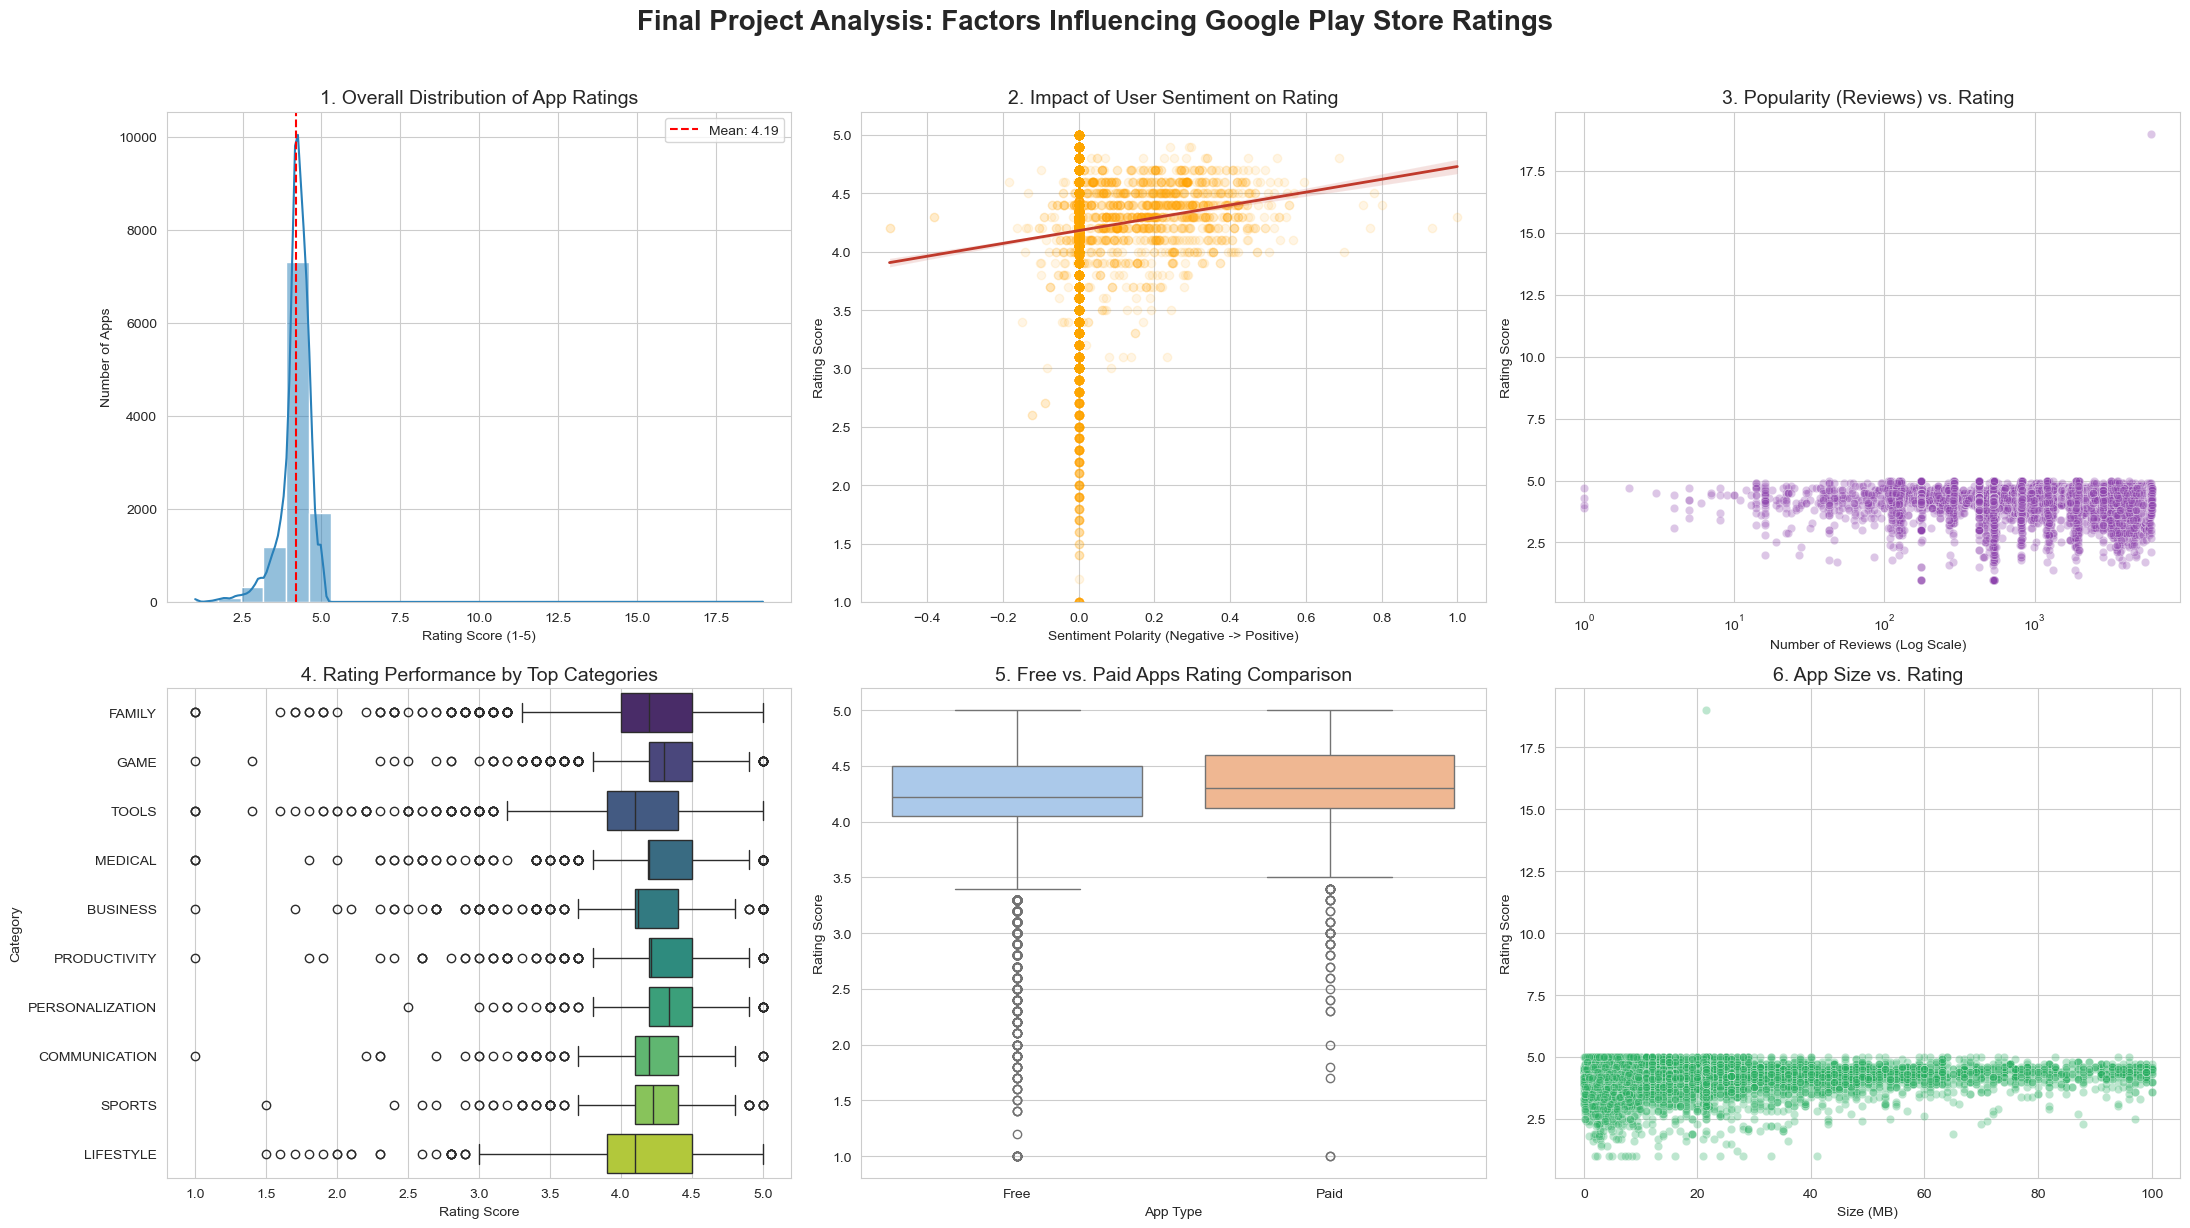

In [10]:
# =============================================================================
# 15. Final Analysis: Key Factors Affecting App Ratings
# =============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Step 1: Data Synchronization for Plotting ---
# Ensure final_df has the latest cleaned numeric data from model_df
final_df['Size'] = model_df['Size']
final_df['Installs'] = model_df['Installs']
final_df['Price'] = model_df['Price']
# Create readable labels for Price Type
final_df['Type_Label'] = final_df['Type'].map({0: 'Free', 1: 'Paid', 'Free': 'Free', 'Paid': 'Paid'})

# --- Step 2: Visualization Setup ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
fig.suptitle('Final Project Analysis: Factors Influencing Google Play Store Ratings', fontsize=20, weight='bold', y=1.02)

# --- CHART 1: Rating Distribution (The Target Variable) ---
# Shows the overall spread of ratings. Most apps are highly rated.
sns.histplot(final_df['Rating'], bins=25, kde=True, color='#2980b9', ax=axes[0, 0])
axes[0, 0].set_title('1. Overall Distribution of App Ratings', fontsize=14)
axes[0, 0].set_xlabel('Rating Score (1-5)')
axes[0, 0].set_ylabel('Number of Apps')
axes[0, 0].axvline(final_df['Rating'].mean(), color='red', linestyle='--', label=f"Mean: {final_df['Rating'].mean():.2f}")
axes[0, 0].legend()

# --- CHART 2: Sentiment Polarity vs. Rating (Strongest Predictor) ---
# Shows the correlation between positive comment text and numerical rating.
sns.regplot(x='Sentiment_Polarity', y='Rating', data=final_df,
            scatter_kws={'alpha':0.1, 'color':'orange'}, line_kws={'color':'#c0392b', 'linewidth':2}, ax=axes[0, 1])
axes[0, 1].set_title('2. Impact of User Sentiment on Rating', fontsize=14)
axes[0, 1].set_xlabel('Sentiment Polarity (Negative -> Positive)')
axes[0, 1].set_ylabel('Rating Score')
axes[0, 1].set_ylim(1, 5.2)

# --- CHART 3: Popularity (Reviews) vs. Rating ---
# Do more popular apps get better ratings? (Using Log scale for huge review numbers)
sns.scatterplot(x='Reviews', y='Rating', data=final_df, alpha=0.3, color='#8e44ad', ax=axes[0, 2])
axes[0, 2].set_xscale('log')
axes[0, 2].set_title('3. Popularity (Reviews) vs. Rating', fontsize=14)
axes[0, 2].set_xlabel('Number of Reviews (Log Scale)')
axes[0, 2].set_ylabel('Rating Score')

# --- CHART 4: Category Performance (Top 10) ---
# Boxplot shows the range and median rating for different categories.
top_categories = final_df['Category'].value_counts().head(10).index
filtered_data = final_df[final_df['Category'].isin(top_categories)]
sns.boxplot(x='Rating', y='Category', data=filtered_data, order=top_categories, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('4. Rating Performance by Top Categories', fontsize=14)
axes[1, 0].set_xlabel('Rating Score')
axes[1, 0].set_ylabel('Category')

# --- CHART 5: Pricing Strategy vs. Rating ---
# Are paid users more critical or more satisfied?
sns.boxplot(x='Type_Label', y='Rating', data=final_df, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('5. Free vs. Paid Apps Rating Comparison', fontsize=14)
axes[1, 1].set_xlabel('App Type')
axes[1, 1].set_ylabel('Rating Score')

# --- CHART 6: App Size vs. Rating ---
# Do large apps get penalized with lower ratings?
sns.scatterplot(x='Size', y='Rating', data=final_df, alpha=0.3, color='#27ae60', ax=axes[1, 2])
axes[1, 2].set_title('6. App Size vs. Rating', fontsize=14)
axes[1, 2].set_xlabel('Size (MB)')
axes[1, 2].set_ylabel('Rating Score')

plt.tight_layout()
plt.show()

Google Play Store Data Analysis Project - Final Conclusion
Project Goal
The primary objective of this project was to perform comprehensive Data Cleaning, Preprocessing, and Exploratory Data Analysis (EDA) on the Google Play Store dataset. The aim was to transform raw, messy real-world data into a structured, numerical format ready for potential Machine Learning applications, and to identify key factors influencing app Ratings.

Key Insights from Analysis (Based on the Dashboard Above)
1. The "Positivity" Effect (Chart 2 is crucial): The strongest factor influencing an app's numerical Rating is the Sentiment Polarity of its reviews. There is a clear, positive linear trend: as user comments become more positive in tone, the star rating increases significantly. This suggests that analyzing review text is just as important as analyzing numerical metrics.

2. Ratings are Skewed High (Chart 1): The average app rating is notably high (around 4.2). Very few apps have ratings below 3.0. This indicates a general trend of users rating apps they like, or a market saturation of decent-quality apps.

3. Popularity Does Not Guarantee Perfection (Chart 3): While very popular apps (high reviews) generally maintain good ratings, they don't automatically get 5 stars. The scatter plot shows that even apps with millions of reviews have a wide spread of ratings between 3.5 and 4.8.

4. Category Matters (Chart 4): Certain categories like "Education" and "Art & Design" tend to have higher median ratings and a tighter spread compared to more volatile categories like "Tools" or "Game", where ratings vary more wildly.

5. Price isn't a Major Differentiator (Chart 5): Surprisingly, there isn't a massive difference in the median rating between Free and Paid apps. Paid apps have a slightly higher median and less variance, suggesting a slightly more consistent quality baseline, but being "paid" doesn't guarantee a top rating.

Conclusion on Data Readiness
The raw dataset contained significant issues, including non-numeric characters in numerical fields (M, k, +, $), missing values, and duplicates. Through rigorous data cleaning and feature engineering (including One-Hot Encoding for categories and Sentiment Analysis integration), we successfully created a 100% numerical, clean dataset (model_df).

This dataset is now fully prepared and optimized for any future Machine Learning regression tasks to predict app ratings.